## HW Week 12 (#10) - Data fitting with various functions - Due Friday Nov 11, 2022

You will be using the same data "miniDR17.fits" from the TCU Online Week 11:<br>

Remember you need to remove Identified bad data, 
however data that are just bad in one quantity may remain
Use masking to remove any remaining bad values (typically 9999 or -9999 in this file, <b>but remember to remove Outlier!!!!  If you are not sure, ask!!!</b>). 

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)


# Monte Carlo-version of 2 parameter Curve Fit that can use BOTH x and Y errors
def mcFit2(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1]):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        slope.append(popt[0])
        y_ints.append(popt[1])
    return (np.median(slope),np.median(y_ints))


# Monte Carlo-version of 3 parameter Curve Fit that can use BOTH x and Y errors
def mcFit3(func, x, y, x_err=0.1, y_err=0.1,p0=[1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))

# Monte Carlo-version of 4 parameter Curve Fit that can use BOTH x and Y errors
def mcFit4(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])
    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))


In [2]:
# READ IN FITS FILES
star_hdus = fits.open('miniDR17.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

ColDefs(
    name = 'APOGEE_ID'; format = '30A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'TEFF'; format = 'E'
    name = 'TEFF_ERR'; format = 'E'
    name = 'LOGG'; format = 'E'
    name = 'LOGG_ERR'; format = 'E'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'SNR'; format = 'E'
    name = 'VHELIO_AVG'; format = 'E'
    name = 'VERR'; format = 'E'
    name = 'FE_H'; format = 'E'
    name = 'FE_H_ERR'; format = 'E'
    name = 'O_FE'; format = 'E'
    name = 'O_FE_ERR'; format = 'E'
    name = 'NI_FE'; format = 'E'
    name = 'NI_FE_ERR'; format = 'E'
    name = 'NVISTIS'; format = 'J'
    name = 'VSCATTER'; format = 'E'
    name = 'ASPCAPFLAG'; format = 'K'
    name = 'STARFLAG'; format = 'K'
    name = 'EXTRATARG'; format = 'J'
    name = 'GAIA_PARALLAX'; format = 'E'
    name = 'GAIA_PARALLAX_ERROR'; for

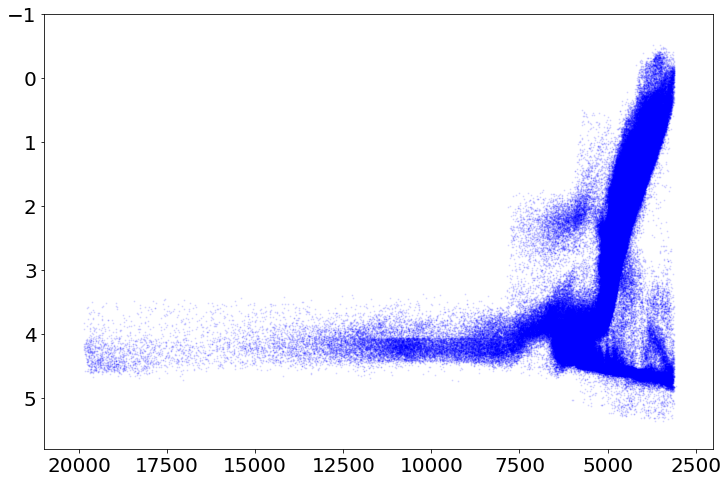

In [3]:
# TWO BITWISE FLAGS FOR BAD DATA - THESE REMOVE IDENTIFIED BAD DATA            
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.scatter((star['TEFF'][good]),star['LOGG'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlim(21000,2000)
ax.set_ylim(5.8,-1)


plt.show()



## DATA FIT 3

Fit a linear, polynomial (poly3), and a sigmoid functions and to the following selections of the data:<br>
3. Select stars only with with $GLAT > 60$ <br>
   __Fit Fe\_H,  (Fe\_H\_ERR)  vs.  NI\_FE (NI\_FE\_ERR)__<br>

For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: 0.001, 0.018
POLY3: 0.001, 0.002, 0.003,  0.018
SIGMOID: 1.759, 0.004, 0.412, -0.186


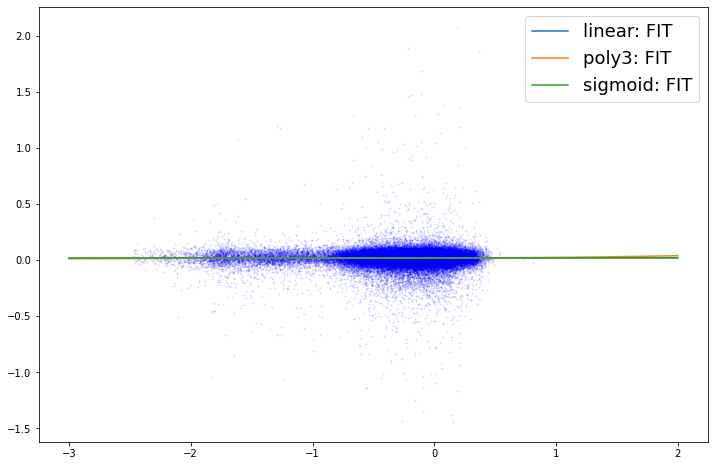

In [4]:
# write you fitting code and plot the results here

# Make a Boolena Mask to remove bad data
gd1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) & (star['GLAT'] > 60)
good1 = np.where(gd1)[0]

FE_H = star['FE_H'][~np.isnan(star['FE_H'])]
FE_H = star['FE_H'][np.isfinite(star['FE_H'])]
#
FE_H_ERR = star['FE_H_ERR'][~np.isnan(star['FE_H_ERR'])]
FE_H_ERR = star['FE_H_ERR'][np.isfinite(star['FE_H_ERR'])]
#
NI_FE = star['NI_FE'][~np.isnan(star['NI_FE'])]
NI_FE = star['NI_FE'][np.isfinite(star['NI_FE'])]
#
NI_FE_ERR = star['NI_FE_ERR'][~np.isnan(star['NI_FE_ERR'])]
NI_FE_ERR = star['NI_FE_ERR'][np.isfinite(star['NI_FE_ERR'])]
#


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(12,8))
ax1 = fig1.add_subplot(111)
ax1.scatter((FE_H[good1]),NI_FE[good1],s=1,c='b',alpha=0.1)

# ax1.xaxis.set_tick_params(labelsize=20)
# ax1.yaxis.set_tick_params(labelsize=20)

## PLOT THE LINES OF BEST FIT ###

##LINEAR
slope1, intercept1 = mcFit2(linear, FE_H[good1], NI_FE[good1], FE_H_ERR[good1], \
                          NI_FE_ERR[good1], p0=[0,0])
print(f'LINEAR: {slope1:.3f}, {intercept1:.3f}')
x_vals = np.linspace(-3,2,50)
ax1.plot(x_vals,linear(x_vals, slope1, intercept1), label='linear: FIT') # linear fit plot

# ##POLY3good1
poly3A1, poly3B1, poly3C1, poly3D1  = mcFit4(poly3, FE_H[good1], NI_FE[good1], FE_H_ERR[good1], \
                         NI_FE_ERR[good1],p0=[.001,0,0,0])
print(f'POLY3: {poly3A1:.3f}, {poly3B1:.3f}, {poly3C1:.3f}, {poly3D1: .3f}')
ax1.plot(x_vals,poly3(x_vals, poly3A1, poly3B1, poly3C1, poly3D1), label='poly3: FIT') # poly3 fit

# ##SIGMOID FUNCTION
sigA1, sigB1, sigC1, sigD1 = mcFit4(sigmoid, FE_H[good1], NI_FE[good1], FE_H_ERR[good1], \
                         NI_FE_ERR[good1],p0=[0,0,0,0])
print(f'SIGMOID: {sigA1:.3f}, {sigB1:.3f}, {sigC1:.3f}, {sigD1: .3f}')
ax1.plot(x_vals,sigmoid(x_vals, sigA1, sigB1, sigC1, sigD1), label='sigmoid: FIT') # sigmoid fit

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 4

Fit  a linear, a logfit, and a polynomial (poly2) functions and to the following selections of the data:<br>
4. Select stars only with with $GLAT < -10$  <br>
   __Fit TEFF,  (TEFF\_ERR)   vs.  (star['J'] - star['K']) with error of (np.sqrt(star['J\_ERR']\*\*2 + star['K\_ERR']\*\*2))__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: -0.000, 1.634
POLY2: 0.000, -0.001, 2.666


C:\Users\mason\AppData\Local\Temp\ipykernel_15548\3932149318.py:23: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x + c) + d


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

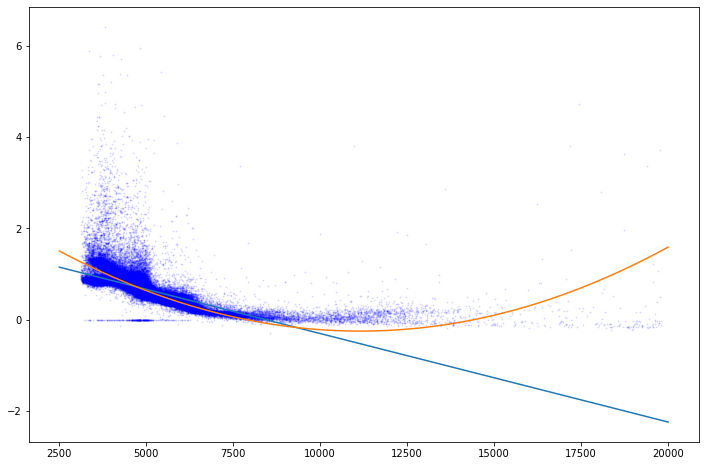

In [7]:
# write you fitting code and plot the results here

# Make a Boolena Mask to remove bad data
gd2 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) & (star['GLAT'] < -10)
good2 = np.where(gd2)[0]


#
K = star['K'][good2]
J = star['J'][good2]
STAR_JK = J - K
#
TEFF = star['TEFF'][good2]
#
TEFF_ERR = star['TEFF_ERR'][good2]
#
J_ERR = star['J_ERR'][good2]
K_ERR = star['K_ERR'][good2]
STAR_JK_ERR = (np.sqrt(J_ERR**2 + K_ERR**2))


# MASKS
TEFF = TEFF[~np.isnan(STAR_JK)]
TEFF_ERR = TEFF_ERR[~np.isnan(STAR_JK)]
STAR_JK_ERR = STAR_JK_ERR[~np.isnan(STAR_JK)]
STAR_JK = STAR_JK[~np.isnan(STAR_JK)]

STAR_JK = STAR_JK[~np.isnan(TEFF)]
STAR_JK_ERR = STAR_JK_ERR[~np.isnan(TEFF)]
TEFF_ERR = TEFF_ERR[~np.isnan(TEFF)]
TEFF = TEFF[~np.isnan(TEFF)]

#
TEFF_ERR = TEFF_ERR[~np.isnan(STAR_JK_ERR)]
TEFF = TEFF[~np.isnan(STAR_JK_ERR)]
STAR_JK = STAR_JK[~np.isnan(STAR_JK_ERR)]
STAR_JK_ERR = STAR_JK_ERR[~np.isnan(STAR_JK_ERR)]

STAR_JK_ERR = STAR_JK_ERR[~np.isnan(TEFF_ERR)]
STAR_JK = STAR_JK[~np.isnan(TEFF_ERR)]
TEFF = TEFF[~np.isnan(TEFF_ERR)]
TEFF_ERR = TEFF_ERR[~np.isnan(TEFF_ERR)]
#

# # PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig2 = plt.figure(figsize=(12,8))
ax2 = fig2.add_subplot(111)
ax2.scatter((TEFF),STAR_JK,s=1,c='b',alpha=0.1)

#LINEAR
slope4, intercept4 = mcFit2(linear, TEFF, STAR_JK, TEFF_ERR, \
                          STAR_JK_ERR, p0=[0,0])
print(f'LINEAR: {slope4:.3f}, {intercept4:.3f}')
x_vals = np.linspace(2500,20000,100)
ax2.plot(x_vals,linear(x_vals, slope4, intercept4), label='linear: FIT') # linear fit plot

#POLY 2
poly2A4, poly2B4, poly2C4 = mcFit3(poly2, TEFF, STAR_JK, TEFF_ERR, \
                                  STAR_JK_ERR, p0=[0,0,0])
print(f'POLY2: {poly2A4:.3f}, {poly2B4:.3f}, {poly2C4:.3f}')
ax2.plot(x_vals, poly2(x_vals, poly2A4, poly2B4, poly2C4), label='poly2: FIT') # poly2 fit

# LOG FIT
logA4, logB4, logC4, logD4 = mcFit4(logfit, TEFF, STAR_JK, TEFF_ERR, \
                                   STAR_JK_ERR, p0=[1,1,1,1])
ax2.plot(x_vals, logfit(x_vals, logA4, logB4, logC4, logD4), label='log: FIT')

plt.legend(loc='best', fontsize=18)
ax2.set_xlim(2500,20000)
ax2.set_ylim(-10, 20)
plt.show()

## DATA FIT 5

Fit  a linear, a polynomial (poly3), and a cosfit functions and to the following selections of the data:<br>
5. Select stars only with with $-10< GLAT < 10$<br>
   __Fit GLON  vs.  VHEILO\_AVG (VERR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: -0.001, -3.966
POLY3: -0.000, 0.014, -1.781,  27.970
COSINE: -1.668, -3.600,  1.546, -4.142


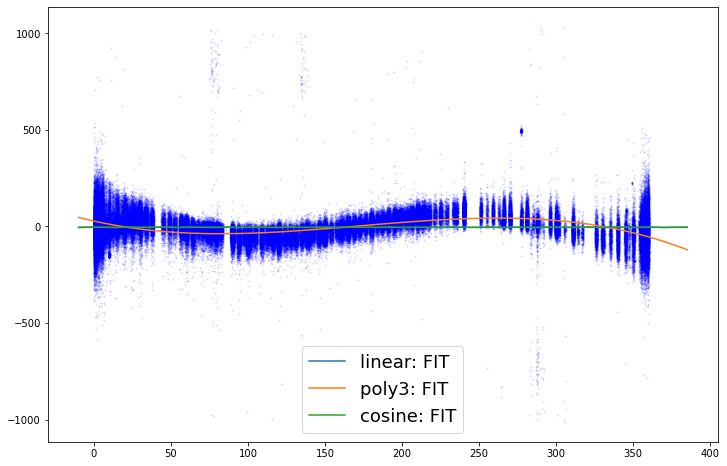

In [34]:
# write you fitting code and plot the results here

# Make a Boolena Mask to remove bad data
gd3 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &((star['GLAT'] < 10) & (star['GLAT'] > -10))
good3 = np.where(gd3)[0]

GLON = star['GLON'][good3]
VHELIO_AVG = star['VHELIO_AVG'][good3]
VERR = star['VERR'][good3]

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig3 = plt.figure(figsize=(12,8))
ax3 = fig3.add_subplot(111)
ax3.scatter((GLON),VHELIO_AVG,s=1,c='b',alpha=0.1)

#LINEAR
slope5, intercept5 = mcFit2(linear, GLON, VHELIO_AVG, .05, \
                          VERR, p0=[0,0])
print(f'LINEAR: {slope5:.3f}, {intercept5:.3f}')
x_vals = np.linspace(-10,385,50)
ax3.plot(x_vals,linear(x_vals, slope5, intercept5), label='linear: FIT') # linear fit plot

#POLY3
poly3A5, poly3B5, poly3C5, poly3D5  = mcFit4(poly3, GLON, VHELIO_AVG, .05, \
                            VERR,p0=[.001,0,0,0])
print(f'POLY3: {poly3A5:.3f}, {poly3B5:.3f}, {poly3C5:.3f}, {poly3D5: .3f}')
ax3.plot(x_vals,poly3(x_vals, poly3A5, poly3B5, poly3C5, poly3D5), label='poly3: FIT') # poly3 fit

#COSINE
cosA5, cosB5, cosC5, cosD5 = mcFit4(cosfit, GLON, VHELIO_AVG, .05, \
                                   VERR, p0=[0,0,0,0])
print(f'COSINE: {cosA5: .3f}, {cosB5: .3F}, {cosC5: .3F}, {cosD5: .3F}')
ax3.plot(x_vals,cosfit(x_vals, cosA5, cosB5, cosC5, cosD5), label='cosine: FIT')

plt.legend(loc='best', fontsize = 18)
plt.show()

## DATA FIT 6

Fit a linear, an exponential, and a polynomial (poly3) functions and to the following selections of the data:<br>
6. __Fit NVISITS vs.  VSCATTER (VERR)__ For NVISITS $>= 1$<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: 0.107, 0.452


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

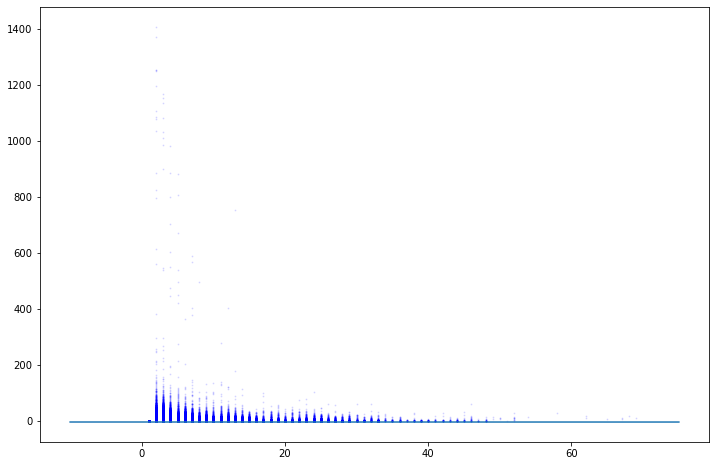

In [38]:
# write you fitting code and plot the results here

# Make a Boolena Mask to remove bad data
gd4 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) & (star['NVISTIS'] >= 1)
good4 = np.where(gd4)[0]

NVISTIS = star['NVISTIS'][good4]
#
VSCATTER = star['VSCATTER'][good4]
#
VERR = star['VERR'][good4]

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig4 = plt.figure(figsize=(12,8))
ax4 = fig4.add_subplot(111)
ax4.scatter((NVISTIS),VSCATTER,s=1,c='b',alpha=0.1)

#LINEAR
slope6, intercept6 = mcFit2(linear, NVISTIS, VSCATTER, .05, \
                          VERR, p0=[0,0])
print(f'LINEAR: {slope6:.3f}, {intercept6:.3f}')
x_vals = np.linspace(-10,75,50)
ax4.plot(x_vals,linear(x_vals, slope5, intercept5), label='linear: FIT') # linear fit plot

# EXPONENTIAL
expA5, expB5, expC5, expD5 = mcFit4(exponential, NVISTIS, VSCATTER, .05, \
                                   VERR, p0=[1,0,1,1])
print(f'EXPONENTIAL: {expA5: .3f}, {expB5: .3F}, {expC5: .3F}, {expD5: .3F}')
ax4.plot(x_vals,exponential(x_vals, expA5, expB5, expC5, expD5), label='cosine: FIT')

#POLY3
poly3A6, poly3B6, poly3C6, poly3D6  = mcFit4(poly3, GLON, VHELIO_AVG, .05, \
                            VERR,p0=[.001,0,0,0])
print(f'POLY3: {poly3A6:.3f}, {poly3B6:.3f}, {poly3C6:.3f}, {poly3D6: .3f}')
ax4.plot(x_vals,poly3(x_vals, poly3A6, poly3B6, poly3C6, poly3D6), label='poly3: FIT') # poly3 fit

plt.legend(loc='best', fontsize = 18)
plt.show()

## DATA FIT 7

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
7. __Fit RA  vs.  GAIA_PMRA (GAIA_PMRA_ERROR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [ ]:
# write you fitting code and plot the results here

# Make a Boolena Mask to remove bad data
gd5 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)
good5 = np.where(gd5)[0]

RA = star['RA'][good5]
GAIA_PMRA = star['GAIA_PMRA'][good5]
GAIA_PMRA_ERR = star['GAIA_PMRA_ERROR'][good5]
#
RA = RA[~np.isnan(GAIA_PMRA)]
GAIA_PMRA_ERR = GAIA_PMRA_ERR[~np.isnan(GAIA_PMRA)]
GAIA_PMRA = GAIA_PMRA[~np.isnan(GAIA_PMRA)]

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig5 = plt.figure(figsize=(12,8))
ax5 = fig5.add_subplot(111)
ax5.scatter(RA,GAIA_PMRA,s=1,c='b',alpha=0.1)

#LINEAR
slope7, intercept7 = mcFit2(linear, RA, GAIA_PMRA, .05, \
                          GAIA_PMRA_ERR, p0=[0,0])
print(f'LINEAR: {slope7:.3f}, {intercept7:.3f}')
x_vals = np.linspace(-10,75,50)
ax5.plot(x_vals,linear(x_vals, slope7, intercept7), label='linear: FIT') # linear fit plot

#POLY 2
poly2A7, poly2B7, poly2C7 = mcFit3(poly2, RA, GAIA_PMRA, .05, \
                                  GAIA_PMRA_ERR, p0=[0,0,0])
print(f'POLY2: {poly2A7:.3f}, {poly2B7:.3f}, {poly2C7:.3f}')
ax5.plot(x_vals, poly2(x_vals, poly2A7, poly2B7, poly2C7), label='poly2: FIT') # poly2 fit

#POLY3
poly3A7, poly3B7, poly3C7, poly3D7  = mcFit4(poly3, RA, GAIA_PMRA, .05, \
                            GAIA_PMRA_ERR, p0=[.001,0,0,0])
print(f'POLY3: {poly3A7:.3f}, {poly3B7:.3f}, {poly3C7:.3f}, {poly3D7: .3f}')
ax5.plot(x_vals,poly3(x_vals, poly3A7, poly3B7, poly3C7, poly3D7), label='poly3: FIT') # poly3 fit


plt.legend(loc='best', fontsize = 18)
plt.show()

LINEAR: -0.019, 0.602


## DATA FIT 8

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
8. select stars with only TEFF < 6000 and LOGG < 3<br>
__Fit TEFF (TEFF_ERR)  vs.  LOGG (LOGG_ERR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [ ]:
# write you fitting code and plot the results here
# Make a Boolena Mask to remove bad data
gd6 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) & (star['TEFF'] < 6000) & (star['LOGG'] < 3)
good6 = np.where(gd6)[0]

TEFF = star['TEFF']
TEFF = TEFF[good6]
TEFF = TEFF[~np.isnan(TEFF)]
TEFF = TEFF[np.isfinite(TEFF)]
#
TEFF_ERR = star['TEFF_ERR']
TEFF_ERR = TEFF_ERR[good6]
TEFF_ERR = TEFF_ERR[~np.isnan(TEFF_ERR)]
TEFF_ERR = TEFF_ERR[np.isfinite(TEFF_ERR)]
#
LOGG = star['LOGG']
LOGG = LOGG[good6]
LOGG = LOGG[~np.isnan(LOGG)]
LOGG = LOGG[np.isfinite(LOGG)]
#
LOGG_ERR = star['LOGG_ERR']
LOGG_ERR = LOGG_ERR[good6]
LOGG_ERR = LOGG_ERR[~np.isnan(LOGG_ERR)]
LOGG_ERR = LOGG_ERR[np.isfinite(LOGG_ERR)]

# LINEAR
slope8, intercept8 = mcFit2(linear, TEFF, LOGG, TEFF_ERR, \
                          LOGG_ERR, p0=[0,0])
print(f'LINEAR: {slope8:.3f}, {intercept8:.3f}')
x_vals = np.linspace(-3,2,50)

ax6.plot(x_vals,linear(x_vals, slope8, intercept8), label='linear: FIT') # linear fit plot

# POLY3
poly3A8, poly3B8, poly3C8, poly3D8  = mcFit4(poly3, TEFF, LOGG, TEFF_ERR, \
                         LOGG_ERR, p0=[.001,0,0,0])
print(f'POLY3: {poly3A8:.3f}, {poly3B8:.3f}, {poly3C8:.3f}, {poly3D8: .3f}')
ax6.plot(x_vals, poly3(x_vals, poly3A8, poly3B8, poly3C8, poly3D8), label='poly3: FIT') # poly3 fit

#POLY 2
poly2A8, poly2B8, poly2C8 = mcFit3(poly2, TEFF, LOGG, TEFF_ERR, \
                                  LOGG_ERR, p0=[0,0,0])
print(f'POLY2: {poly2A8:.3f}, {poly2B8:.3f}, {poly2C8:.3f}')
ax6.plot(x_vals, poly2(xvals, poly2A8, poly2B8, poly2C8), label='poly2:FIT') # poly2 fit

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig6 = plt.figure(figsize=(12,8))
ax6 = fig6.add_subplot(111)
ax6.scatter((TEFF),LOGG,s=1,c='b',alpha=0.1)

plt.show()

## DATA FIT 9

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
9. __Fit GAIA_PARALLAX (GAIA_PARALLAX_ERROR) vs.  GAIA_PMRA (GAIA_PMRA_ERROR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [ ]:
# Make a Boolena Mask to remove bad data
gd7 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) & (star['NVISTIS'] >= 1)

good7 = np.where(gd7)[0]

GAIA_PARALLAX = star['GAIA_PARALLAX']
GAIA_PARALLAX = GAIA_PARALLAX[good7]
GAIA_PARALLAX = GAIA_PARALLAX[~np.isnan(GAIA_PARALLAX)]
GAIA_PARALLAX = GAIA_PARALLAX[np.isfinite(GAIA_PARALLAX)]
#
GAIA_PARALLAX_ERR = star['GAIA_PARALLAX_ERROR']
GAIA_PARALLAX_ERR = GAIA_PARALLAX_ERR[good7]
GAIA_PARALLAX_ERR = GAIA_PARALLAX_ERR[~np.isnan(GAIA_PARALLAX_ERR)]
GAIA_PARALLAX_ERR = GAIA_PARALLAX_ERR[np.isfinite(GAIA_PARALLAX_ERR)]
#
GAIA_PMRA = star['GAIA_PMRA']
GAIA_PMRA = GAIA_PMRA[good7]
GAIA_PMRA = GAIA_PMRA[~np.isnan(GAIA_PMRA)]
GAIA_PMRA = GAIA_PMRA[np.isfinite(GAIA_PMRA)]
#
GAIA_PMRA_ERR = star['GAIA_PMRA_ERROR']
GAIA_PMRA_ERR = GAIA_PMRA_ERR[good7]
GAIA_PMRA_ERR = GAIA_PMRA_ERR[~np.isnan(GAIA_PMRA_ERR)]
GAIA_PMRA_ERR = GAIA_PMRA_ERR[np.isfinite(GAIA_PMRA_ERR)]

# # LINEAR
slope9, intercept9 = mcFit2(linear, GAIA_PARALLAX, GAIA_PMRA, GAIA_PARALLAX_ERR, \
                          GAIA_PMRA_ERR, p0=[0,0])
print(f'LINEAR: {slope9:.3f}, {intercept9:.3f}')
x_vals = np.linspace(-25,200,50)
ax7.plot(x_vals,linear(x_vals, slope9, intercept9), label='linear: FIT') # linear fit plot

# POLY3
poly3A9, poly3B9, poly3C9, poly3D9  = mcFit4(poly3, GAIA_PARALLAX, GAIA_PMRA, GAIA_PARALLAX_ERR, \
                         GAIA_PMRA_ERR,p0=[.001,0,0,0])
print(f'POLY3: {poly3A9:.3f}, {poly3B9:.3f}, {poly3C9:.3f}, {poly3D9: .3f}')
ax7.plot(x_vals,poly3(x_vals, poly3A9, poly3B9, poly3C9, poly3D9), label='poly3: FIT') # poly3 fit

#POLY 2
poly2A9, poly2B9, poly2C9 = mcFit3(poly2, GAIA_PARALLAX, GAIA_PMRA, GAIA_PARALLAX_ERR, \
                                  GAIA_PMRA_ERR, p0=[0,0,0])
print(f'POLY2: {poly2A9:.3f}, {poly2B9:.3f}, {poly2C9:.3f}')
ax7.plot(x_vals, poly2(x_vals, poly2A9, poly2B9, poly2C9), label='poly2:FIT') # poly2 fit

# PLOT
fig7 = plt.figure(figsize=(12,8))
ax7 = fig7.add_subplot(111)
ax7.scatter((GAIA_PARALLAX),GAIA_PMRA,s=1,c='b',alpha=0.1)

plt.show()